In [10]:
# Visualize the results from a pde1bvp_coupled_pinn.py run.

In [11]:
from importlib import import_module
import math as m
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [12]:
# Specify the run ID (aka problem name).
runid = "alfven_wave2"

# Add the subdirectory for the run results to the module search path.
run_path = os.path.join(".", runid)
sys.path.append(run_path)

# Import the problem definition from the run results directory.
p = import_module(runid)

# Read the run hyperparameters from the run results directory.
import hyperparameters as hp

In [13]:
# Load the training points.
xy_train = np.loadtxt(os.path.join(runid, "xy_train.dat"))

In [14]:
# Load the loss function histories.
losses_model_in = np.loadtxt(os.path.join(runid, "losses_model_in.dat"))
losses_model_bc = np.loadtxt(os.path.join(runid, "losses_model_bc.dat"))
losses_model = np.loadtxt(os.path.join(runid, "losses_model.dat"))
losses_in = np.loadtxt(os.path.join(runid, "losses_in.dat"))
losses_bc = np.loadtxt(os.path.join(runid, "losses_bc.dat"))
losses = np.loadtxt(os.path.join(runid, "losses.dat"))


In [15]:
# Load the model values.
Y = []
delY = []
for i in range(len(p.variable_names)):
    var_name = p.variable_names[i]
    Y.append(np.loadtxt(os.path.join(runid, "%s_train.dat" % var_name)))
    delY.append(np.loadtxt(os.path.join(runid, "del_%s_train.dat" % var_name)))


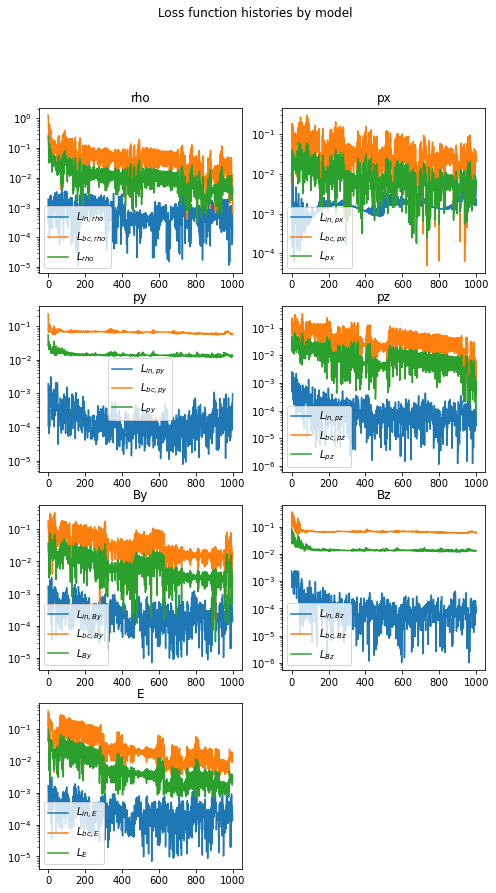

In [16]:
# Plot the loss function histories for the individual models.
n_models = len(p.variable_names)

# Compute the number of rows for the 2-per-row plot.
n_rows = m.ceil(n_models/2)

# Plot the loss history for each model.
plt.figure(figsize=(8, 14))
for i in range(n_models):
    plt.subplot(n_rows, 2, i + 1)
    variable_name = p.variable_names[i]
    plt.semilogy(losses_model_in[:, i], label="$L_{in,%s}$" % variable_name)
    plt.semilogy(losses_model_bc[:, i], label="$L_{bc,%s}$" % variable_name)
    plt.semilogy(losses_model[:, i], label="$L_{%s}$" % variable_name)
    plt.title(variable_name)
    plt.legend()
plt.suptitle("Loss function histories by model")
plt.show()

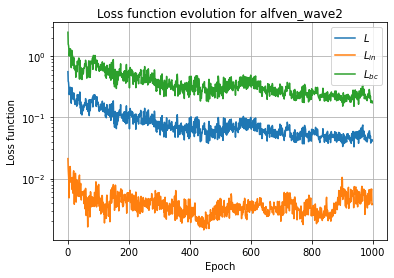

In [17]:
# Plot the total loss function history.
plt.semilogy(losses, label="$L$")
plt.semilogy(losses_in, label="$L_{in}$")
plt.semilogy(losses_bc, label="$L_{bc}$")
plt.xlabel("Epoch")
plt.ylabel("Loss function")
plt.legend()
plt.grid()
plt.title("Loss function evolution for %s" % runid)
plt.show()

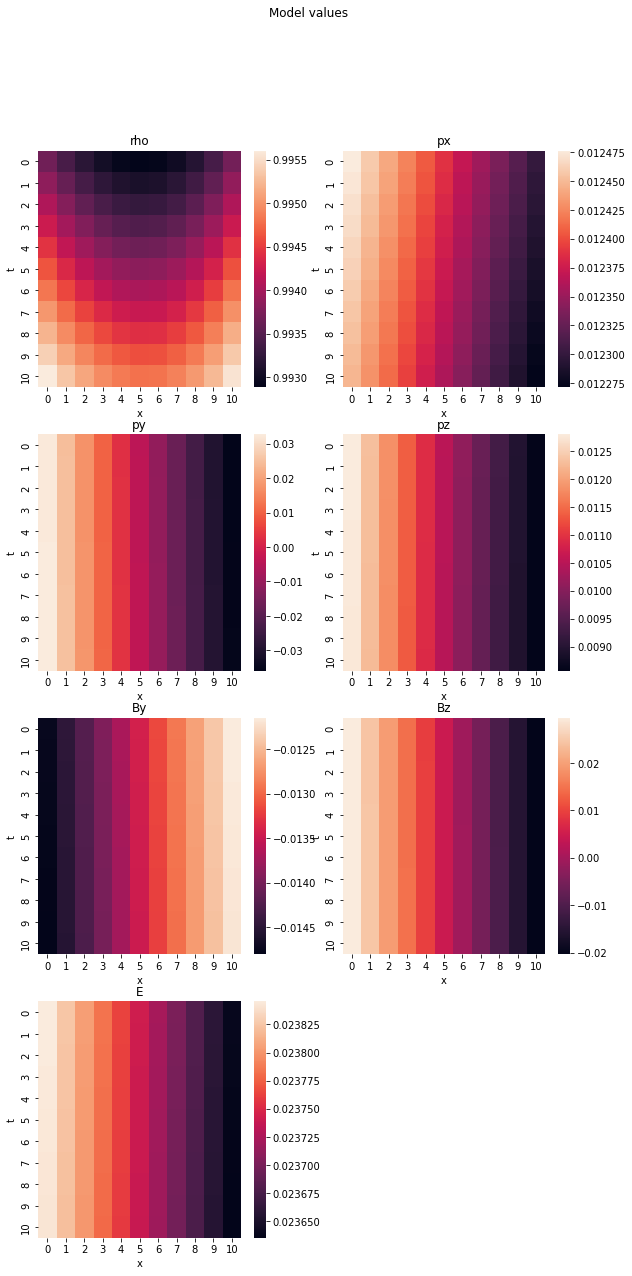

In [18]:
# Load the training points.
xt_train = np.loadtxt(os.path.join(runid, "xy_train.dat"))
x_train = xt_train[:, 0]
t_train = xt_train[:, 1]

# Create plot labels from the training points.
x_labels = ["%.1f" % x for x in x_train[0:-1:hp.ny_train]]
t_labels = ["%.1f" % t for t in t_train[0:hp.nx_train]]
t_labels.reverse()

# Plot the model values.
plt.figure(figsize=(10, 20))
for i in range(n_models):
    plt.subplot(n_rows, 2, i + 1)
    variable_name = p.variable_names[i]
    # For a Seaborn heat map, reshape as (n_x, n_y), then transpose, then flip.
    Z = np.flip(Y[i].reshape(hp.nx_train, hp.ny_train).T, axis=0)
    ax = sns.heatmap(Z)
    ax.set_xlabel("x")
    ax.set_ylabel("t")
    plt.title(variable_name)
plt.suptitle("Model values")
plt.show()